# Image Classification Using Convolutions

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
dir = "../input/natural-images/natural_images"
img_size = (128, 128)

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True, 
    rotation_range=15, 
    validation_split=0.2
)


train_data = datagen.flow_from_directory(
    dir,
    class_mode='categorical',
    target_size=img_size,
    shuffle=True,
    subset='training',
    batch_size=32
)

test_data = datagen.flow_from_directory(
    dir,
    class_mode='categorical',
    target_size=img_size,
    shuffle=True,
    subset='validation',
    batch_size=32
)


Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.


In [4]:
labels = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
def get_labels(preds):
    return labels[tf.math.argmax(preds).numpy()]

person


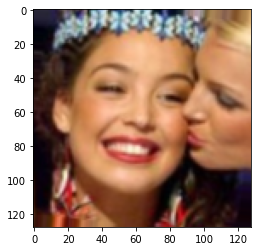

In [5]:
x,y = next(iter(train_data))
plt.imshow(x[5])
print(get_labels(y[5]))

# Making the model
## Using Sequential Model

In [6]:
seq = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(128, 128, 3)),
    Dropout(0.2),
    Conv2D(64, 5, activation='relu'),
    MaxPooling2D(2),
    Dropout(0.2),
    
    Conv2D(128, 5, activation='relu'),
    MaxPooling2D(4),
    Dropout(0.2),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    
    Dense(8, activation='softmax')
])
seq.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0

In [7]:
seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = seq.fit(train_data, epochs=25, validation_data=test_data, )

Epoch 1/25
173/173 [==============================] - 46s 265ms/step - loss: 1.0283 - acc: 0.6201 - val_loss: 0.6246 - val_acc: 0.7749
Epoch 2/25
173/173 [==============================] - 37s 212ms/step - loss: 0.4613 - acc: 0.8281 - val_loss: 0.4230 - val_acc: 0.8526
Epoch 3/25
173/173 [==============================] - 37s 215ms/step - loss: 0.3303 - acc: 0.8817 - val_loss: 0.3896 - val_acc: 0.8627
Epoch 4/25
173/173 [==============================] - 36s 209ms/step - loss: 0.2736 - acc: 0.8975 - val_loss: 0.2953 - val_acc: 0.8940
Epoch 5/25
173/173 [==============================] - 37s 211ms/step - loss: 0.2425 - acc: 0.9089 - val_loss: 0.2828 - val_acc: 0.8976
Epoch 6/25
173/173 [==============================] - 37s 214ms/step - loss: 0.2182 - acc: 0.9221 - val_loss: 0.3339 - val_acc: 0.8824
Epoch 7/25
173/173 [==============================] - 36s 210ms/step - loss: 0.1864 - acc: 0.9317 - val_loss: 0.2828 - val_acc: 0.8925
Epoch 8/25
173/173 [==============================] - 3

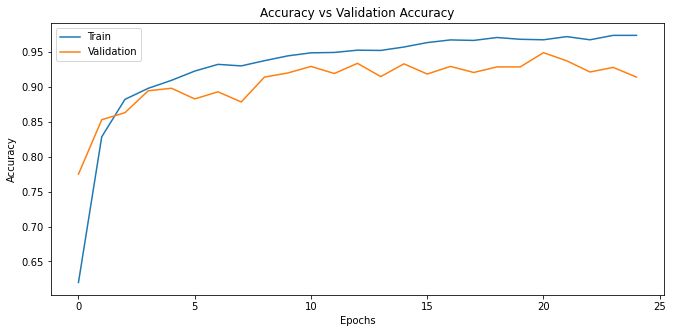

In [8]:
plt.figure(figsize=(11,5))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Validation Accuracy")
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Validation')
plt.legend()

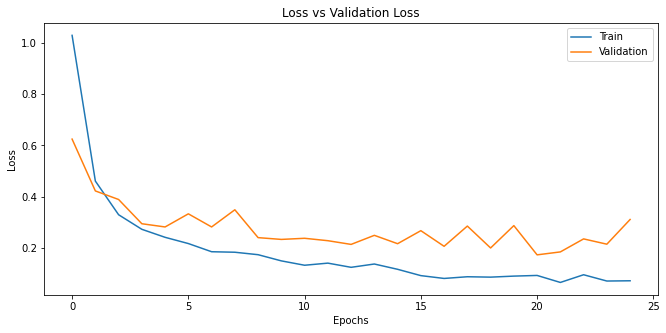

In [9]:
plt.figure(figsize=(11,5))
plt.title('Loss vs Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()